In [ ]:
#MYLNY TYTUŁ 
#jakies mini próby prac nad innymi modelami
#na koniec
#XGBOOST - TRENowanie modelu i dopbieranie hiperparametrów

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from scipy.stats import f_oneway, chi2_contingency
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings('ignore')
np.random.seed = 42

c:\Users\66891\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv('learning_set.csv')
df.head()

,Age,Years_of_Smoking,Cigarettes_per_Day,Passive_Smoker,Family_History,Lung_Cancer_Diagnosis,Air_Pollution_Exposure,Occupational_Exposure,Indoor_Pollution,Healthcare_Access,Total_Exposure,Cigarettes_Total,Age_Smoking_Effect,Smoking_Burden,Exposure_Index,Health_Risk_Score,Gender_Female,Gender_Male
0,80,30,29,0,0,0,0,1,0,0,1,317550,2400,317550,32.0,80.0,0,1
1,53,0,0,1,0,0,0,1,0,0,1,0,0,1000,2.0,53.0,0,1
2,47,12,6,1,0,0,1,0,0,0,1,26280,564,54560,7.0,47.0,0,1
3,39,0,0,0,1,0,0,0,0,0,0,0,0,0,0.0,44.0,1,0
4,44,0,0,1,0,0,1,1,0,0,2,0,0,2000,3.0,44.0,1,0


In [56]:
# Sprawdź brakujące wartości
print(df.isnull().sum())

# Sprawdź typy danych
print(df.dtypes)


Age                       0
Years_of_Smoking          0
Cigarettes_per_Day        0
Passive_Smoker            0
Family_History            0
Lung_Cancer_Diagnosis     0
Air_Pollution_Exposure    0
Occupational_Exposure     0
Indoor_Pollution          0
Healthcare_Access         0
Total_Exposure            0
Cigarettes_Total          0
Age_Smoking_Effect        0
Smoking_Burden            0
Exposure_Index            0
Health_Risk_Score         0
Gender_Female             0
Gender_Male               0
dtype: int64
Age                         int64
Years_of_Smoking            int64
Cigarettes_per_Day          int64
Passive_Smoker              int64
Family_History              int64
Lung_Cancer_Diagnosis       int64
Air_Pollution_Exposure      int64
Occupational_Exposure       int64
Indoor_Pollution            int64
Healthcare_Access           int64
Total_Exposure              int64
Cigarettes_Total            int64
Age_Smoking_Effect          int64
Smoking_Burden              int64
Exposur

In [3]:
# Zakładamy, że kolumna celu nazywa się:
target_column = 'Lung_Cancer_Diagnosis'

X = df.drop(columns=[target_column])
y = df[target_column]


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    stratify=y,        # zachowujemy proporcje klas!
    random_state=42
)

print(f"Train size: {X_train.shape}, Test size: {X_test.shape}")
print(f"Train class distribution:\n{y_train.value_counts(normalize=True)}")
print(f"Test class distribution:\n{y_test.value_counts(normalize=True)}")


Train size: (149600, 17), Test size: (64115, 17)
Train class distribution:
Lung_Cancer_Diagnosis
0    0.960401
1    0.039599
Name: proportion, dtype: float64
Test class distribution:
Lung_Cancer_Diagnosis
0    0.960399
1    0.039601
Name: proportion, dtype: float64


In [5]:
"""
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
"""
X_train_scaled = X_train
X_test_scaled = X_test


In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Model bazowy
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

# Predykcje
y_pred = model.predict(X_test_scaled)

# Ocena
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     61576
           1       0.00      0.00      0.00      2539

    accuracy                           0.96     64115
   macro avg       0.48      0.50      0.49     64115
weighted avg       0.92      0.96      0.94     64115

[[61576     0]
 [ 2539     0]]


In [61]:
model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)


In [62]:
model.fit(X_train_scaled, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [63]:
y_pred = model.predict(X_test_scaled)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.98      0.64      0.78     61576
           1       0.07      0.67      0.13      2539

    accuracy                           0.64     64115
   macro avg       0.53      0.65      0.45     64115
weighted avg       0.94      0.64      0.75     64115

[[39507 22069]
 [  847  1692]]


In [64]:
"""
from sklearn.model_selection import GridSearchCV

# Definiujemy parametry, które chcemy testować
param_grid = [
    {
        'solver': ['liblinear'],
        'penalty': ['l1', 'l2'],
        'C': [0.01, 0.1, 1, 10, 100],
        'max_iter': [200, 500, 1000]
    },
    {
        'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
        'penalty': ['l2'],
        'C': [0.01, 0.1, 1, 10, 100],
        'max_iter': [200, 500, 1000]
    }
]

# Inicjalizujemy model
model = LogisticRegression(class_weight='balanced', random_state=42)

# Tworzymy obiekt GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=1)

# Trenujemy model
grid_search.fit(X_train_scaled, y_train)

# Najlepszy model i jego parametry
print("Best hyperparameters:", grid_search.best_params_)
"""

'\nfrom sklearn.model_selection import GridSearchCV\n\n# Definiujemy parametry, które chcemy testować\nparam_grid = [\n    {\n        \'solver\': [\'liblinear\'],\n        \'penalty\': [\'l1\', \'l2\'],\n        \'C\': [0.01, 0.1, 1, 10, 100],\n        \'max_iter\': [200, 500, 1000]\n    },\n    {\n        \'solver\': [\'newton-cg\', \'lbfgs\', \'sag\', \'saga\'],\n        \'penalty\': [\'l2\'],\n        \'C\': [0.01, 0.1, 1, 10, 100],\n        \'max_iter\': [200, 500, 1000]\n    }\n]\n\n# Inicjalizujemy model\nmodel = LogisticRegression(class_weight=\'balanced\', random_state=42)\n\n# Tworzymy obiekt GridSearchCV\ngrid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring=\'f1\', n_jobs=-1, verbose=1)\n\n# Trenujemy model\ngrid_search.fit(X_train_scaled, y_train)\n\n# Najlepszy model i jego parametry\nprint("Best hyperparameters:", grid_search.best_params_)\n'

In [65]:
"""

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

results = pd.DataFrame(grid_search.cv_results_)
results['params_str'] = results['params'].apply(lambda d: ', '.join(f'{k}={v}' for k, v in d.items()))
results_sorted = results.sort_values(by='mean_test_score', ascending=False)

plt.figure(figsize=(12, 7))
sns.barplot(data=results_sorted.head(10), x='mean_test_score', y='params_str', palette='crest')
plt.xlabel('F1-score (średnia z 5-krotnej walidacji)')
plt.ylabel('Zestaw hiperparametrów')
plt.title('Top 20 kombinacji hiperparametrów według F1-score')
plt.tight_layout()
plt.show()

"""

"\n\nimport pandas as pd\nimport matplotlib.pyplot as plt\nimport seaborn as sns\n\nresults = pd.DataFrame(grid_search.cv_results_)\nresults['params_str'] = results['params'].apply(lambda d: ', '.join(f'{k}={v}' for k, v in d.items()))\nresults_sorted = results.sort_values(by='mean_test_score', ascending=False)\n\nplt.figure(figsize=(12, 7))\nsns.barplot(data=results_sorted.head(10), x='mean_test_score', y='params_str', palette='crest')\nplt.xlabel('F1-score (średnia z 5-krotnej walidacji)')\nplt.ylabel('Zestaw hiperparametrów')\nplt.title('Top 20 kombinacji hiperparametrów według F1-score')\nplt.tight_layout()\nplt.show()\n\n"

In [66]:
"""
plt.figure(figsize=(10, 6))
sns.scatterplot(data=results, x='param_C', y='mean_test_score', hue='param_solver', style='param_penalty', s=100)
plt.title('Wpływ wartości C na F1-score (podział na solver i penalty)')
plt.xlabel('Wartość C')
plt.ylabel('F1-score (średnia)')
plt.grid(True)
plt.tight_layout()
plt.show()
"""

"\nplt.figure(figsize=(10, 6))\nsns.scatterplot(data=results, x='param_C', y='mean_test_score', hue='param_solver', style='param_penalty', s=100)\nplt.title('Wpływ wartości C na F1-score (podział na solver i penalty)')\nplt.xlabel('Wartość C')\nplt.ylabel('F1-score (średnia)')\nplt.grid(True)\nplt.tight_layout()\nplt.show()\n"

In [67]:
from sklearn.linear_model import LogisticRegression

best_model = LogisticRegression(
    C=1,
    max_iter=500,
    penalty='l2',
    solver='sag',
    class_weight='balanced',
    random_state=42
)

best_model.fit(X_train_scaled, y_train)


LogisticRegression(C=1, class_weight='balanced', max_iter=500, random_state=42,
                   solver='sag')

              precision    recall  f1-score   support

           0       0.98      0.64      0.77     61576
           1       0.07      0.67      0.13      2539

    accuracy                           0.64     64115
   macro avg       0.52      0.65      0.45     64115
weighted avg       0.94      0.64      0.75     64115



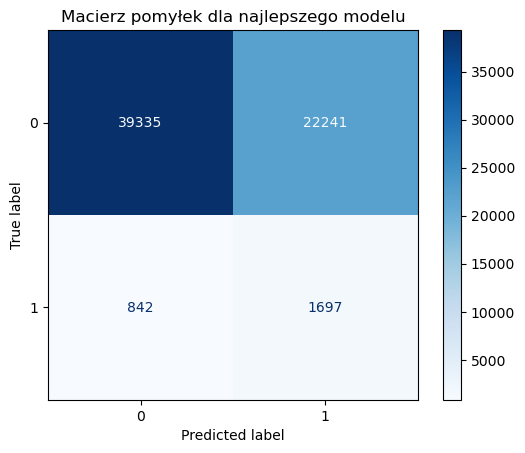

In [68]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

y_pred = best_model.predict(X_test_scaled)

# Raport klasyfikacji
print(classification_report(y_test, y_pred))

# Macierz pomyłek
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Macierz pomyłek dla najlepszego modelu")
plt.show()


In [69]:

from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

# Lista modeli do przetestowania
models = {
    "Logistic Regression": LogisticRegression(C=1, max_iter=500, penalty='l2', solver='sag', class_weight='balanced', random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42),
    "XGBoost": XGBClassifier(scale_pos_weight=24, use_label_encoder=False, eval_metric='logloss', random_state=42),  # 24 = ratio majority/minority
    #"SVC": SVC(kernel='rbf', class_weight='balanced', probability=True, random_state=42),
    #"MLP (Neural Net)": MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
}


In [70]:
results = {}

for name, model in models.items():
    print(f"\n🔍 Trenuję model: {name}")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    # Metryki
    report = classification_report(y_test, y_pred, output_dict=True)
    f1 = f1_score(y_test, y_pred)
    results[name] = {
        "f1_score (class 1)": f1,
        "recall (class 1)": report['1']['recall'],
        "precision (class 1)": report['1']['precision'],
        "accuracy": report['accuracy']
    }

    print(classification_report(y_test, y_pred))



🔍 Trenuję model: Logistic Regression
              precision    recall  f1-score   support

           0       0.98      0.64      0.77     61576
           1       0.07      0.67      0.13      2539

    accuracy                           0.64     64115
   macro avg       0.52      0.65      0.45     64115
weighted avg       0.94      0.64      0.75     64115


🔍 Trenuję model: Random Forest
              precision    recall  f1-score   support

           0       0.96      0.95      0.96     61576
           1       0.02      0.02      0.02      2539

    accuracy                           0.92     64115
   macro avg       0.49      0.49      0.49     64115
weighted avg       0.92      0.92      0.92     64115


🔍 Trenuję model: XGBoost
              precision    recall  f1-score   support

           0       0.97      0.78      0.86     61576
           1       0.07      0.41      0.12      2539

    accuracy                           0.77     64115
   macro avg       0.52      0.6

In [71]:

"""

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Parametry do testowania
param_grid = {
    'n_estimators': [100, 200, 300],           # liczba drzew
    'max_depth': [10, 20, None],               # maksymalna głębokość drzewa
    'min_samples_split': [2, 5, 10],           # minimalna liczba próbek do podziału
    'min_samples_leaf': [1, 2, 4],             # minimalna liczba próbek w liściu
    'max_features': ['auto', 'sqrt', 'log2']   # liczba cech branych pod uwagę przy każdym podziale
}

# Model RandomForest
rf = RandomForestClassifier(random_state=42)

# Tworzymy obiekt GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='f1', n_jobs=-1, verbose=1)

# Trening modelu
grid_search.fit(X_train_scaled, y_train)

# Najlepsze parametry
print("Best hyperparameters:", grid_search.best_params_)
#TO zAJUMJE DŁUGO! dokoncze jutro, policzyłem żę zajęoby to ok. 8h
#dlatego xgboost robi to samo, tylko też na graficznym. Teraz troche z nim powalcze i zobaczymy co sie wydarzy :3
"""

'\n\nfrom sklearn.model_selection import GridSearchCV\nfrom sklearn.ensemble import RandomForestClassifier\n\n# Parametry do testowania\nparam_grid = {\n    \'n_estimators\': [100, 200, 300],           # liczba drzew\n    \'max_depth\': [10, 20, None],               # maksymalna głębokość drzewa\n    \'min_samples_split\': [2, 5, 10],           # minimalna liczba próbek do podziału\n    \'min_samples_leaf\': [1, 2, 4],             # minimalna liczba próbek w liściu\n    \'max_features\': [\'auto\', \'sqrt\', \'log2\']   # liczba cech branych pod uwagę przy każdym podziale\n}\n\n# Model RandomForest\nrf = RandomForestClassifier(random_state=42)\n\n# Tworzymy obiekt GridSearchCV\ngrid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring=\'f1\', n_jobs=-1, verbose=1)\n\n# Trening modelu\ngrid_search.fit(X_train_scaled, y_train)\n\n# Najlepsze parametry\nprint("Best hyperparameters:", grid_search.best_params_)\n#TO zAJUMJE DŁUGO! dokoncze jutro, policzyłem żę zajęoby to

In [72]:
import sys
print(sys.executable)


c:\Users\66891\anaconda3\python.exe


In [73]:
!pip install xgboost


In [6]:
import xgboost as xgb
print("XGBoost version:", xgb.__version__)


from xgboost import XGBClassifier

model = XGBClassifier(tree_method='gpu_hist')
print("Model created OK.")


XGBoost version: 3.0.0
Model created OK.


In [7]:
import xgboost as xgb
from sklearn.metrics import classification_report
import time

# Parametry dla XGBoost
params = {
    'n_estimators': 100,            # Liczba drzew w modelu
    'max_depth': 6,                  # Maksymalna głębokość drzewa
    'learning_rate': 0.1,            # Współczynnik uczenia
    'subsample': 0.8,                # Proporcja próbek do trenowania
    'colsample_bytree': 0.8,         # Proporcja cech do każdego drzewa
    'gamma': 0,                      # Minimalna redukcja straty
    'reg_alpha': 0.01,               # L1 regularization term
    'reg_lambda': 0.01,              # L2 regularization term
    'scale_pos_weight': 1,           # Waga dla klasy 1 (jeśli jest nierównowaga klas)
    'tree_method': 'gpu_hist'        # Używanie GPU, jeśli masz wsparcie
}

# Tworzymy model XGBoost
model = xgb.XGBClassifier(**params)

# Mierzymy czas treningu
start_time = time.time()

# Trenujemy model
model.fit(X_train, y_train)

# Czas trwania treningu
end_time = time.time()
print(f"Trening zakończony w {end_time - start_time:.2f} sekund.")

# Prognozy na zbiorze testowym
y_pred = model.predict(X_test)

# Wyświetlamy metryki
print("\nClassification Report:")
print(classification_report(y_test, y_pred))




Trening zakończony w 2.39 sekund.

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     61576
           1       0.00      0.00      0.00      2539

    accuracy                           0.96     64115
   macro avg       0.48      0.50      0.49     64115
weighted avg       0.92      0.96      0.94     64115



In [8]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score, confusion_matrix, classification_report
import numpy as np

# Używamy f1-score tylko dla klasy 1 (bo na niej nam zależy)
custom_scorer = make_scorer(f1_score, pos_label=1)

param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1],
    'scale_pos_weight': [20, 25, 30]  # ważna zmiana!
}

xgb_model = XGBClassifier(
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss',
    tree_method='gpu_hist'  # jeśli masz GPU
)

grid_search_xgb = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid_xgb,
    scoring=custom_scorer,
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Trenujemy
grid_search_xgb.fit(X_train, y_train)

# Najlepszy model i ocena
best_model = grid_search_xgb.best_estimator_
print("📈 Najlepsze hiperparametry:", grid_search_xgb.best_params_)
print("🎯 Najlepszy wynik (f1 dla klasy 1):", grid_search_xgb.best_score_)

# Sprawdzamy na testowym zbiorze
y_proba = best_model.predict_proba(X_test)[:, 1]
threshold = 0.3
y_pred_thresh = (y_proba >= threshold).astype(int)

# Ocena
print(f"\n🔍 Macierz pomyłek (threshold={threshold}):")
print(confusion_matrix(y_test, y_pred_thresh))
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred_thresh, digits=4))


Fitting 5 folds for each of 288 candidates, totalling 1440 fits
📈 Najlepsze hiperparametry: {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'scale_pos_weight': 20, 'subsample': 1.0}
🎯 Najlepszy wynik (f1 dla klasy 1): 0.12845899006681089

🔍 Macierz pomyłek (threshold=0.3):
[[23532 38044]
 [  495  2044]]

📊 Classification Report:
              precision    recall  f1-score   support

           0     0.9794    0.3822    0.5498     61576
           1     0.0510    0.8050    0.0959      2539

    accuracy                         0.3989     64115
   macro avg     0.5152    0.5936    0.3228     64115
weighted avg     0.9426    0.3989    0.5318     64115



In [9]:
results_df = pd.DataFrame(grid_search_xgb.cv_results_)
results_df = results_df.sort_values(by='mean_test_score', ascending=False)
display(results_df[['params', 'mean_test_score', 'rank_test_score']].head(10))


,params,mean_test_score,rank_test_score
187,"{'colsample_bytree': 1.0, 'gamma': 0, 'learnin...",0.128459,1
189,"{'colsample_bytree': 1.0, 'gamma': 0, 'learnin...",0.128456,2
191,"{'colsample_bytree': 1.0, 'gamma': 0, 'learnin...",0.128400,3
259,"{'colsample_bytree': 1.0, 'gamma': 0.1, 'learn...",0.128398,4
36,"{'colsample_bytree': 0.8, 'gamma': 0, 'learnin...",0.128359,5
108,"{'colsample_bytree': 0.8, 'gamma': 0.1, 'learn...",0.128359,5
261,"{'colsample_bytree': 1.0, 'gamma': 0.1, 'learn...",0.128317,7
44,"{'colsample_bytree': 0.8, 'gamma': 0, 'learnin...",0.128270,8
116,"{'colsample_bytree': 0.8, 'gamma': 0.1, 'learn...",0.128270,8
234,"{'colsample_bytree': 1.0, 'gamma': 0.1, 'learn...",0.128193,10


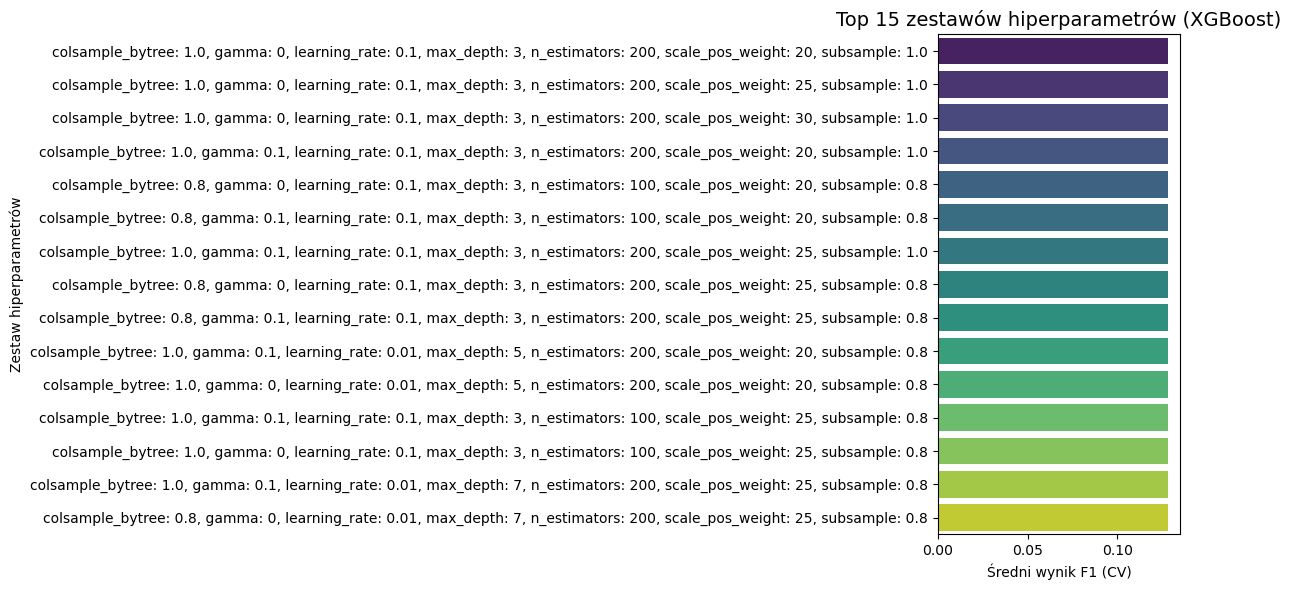

In [10]:
#📊 1. Wykres słupkowy – top 15 kombinacji hiperparametrów:

import matplotlib.pyplot as plt
import seaborn as sns

# Sortujemy wyniki po mean_test_score
top_15 = results_df.sort_values(by='mean_test_score', ascending=False).head(15)

# Tworzymy kolumnę z nazwą parametru (krótszy string)
top_15['param_combo'] = top_15['params'].astype(str).str.replace("'", "").str.replace("{", "").str.replace("}", "")

# Wykres
plt.figure(figsize=(12, 6))
sns.barplot(data=top_15, x='mean_test_score', y='param_combo', palette='viridis')
plt.title('Top 15 zestawów hiperparametrów (XGBoost)', fontsize=14)
plt.xlabel('Średni wynik F1 (CV)')
plt.ylabel('Zestaw hiperparametrów')
plt.tight_layout()
plt.show()


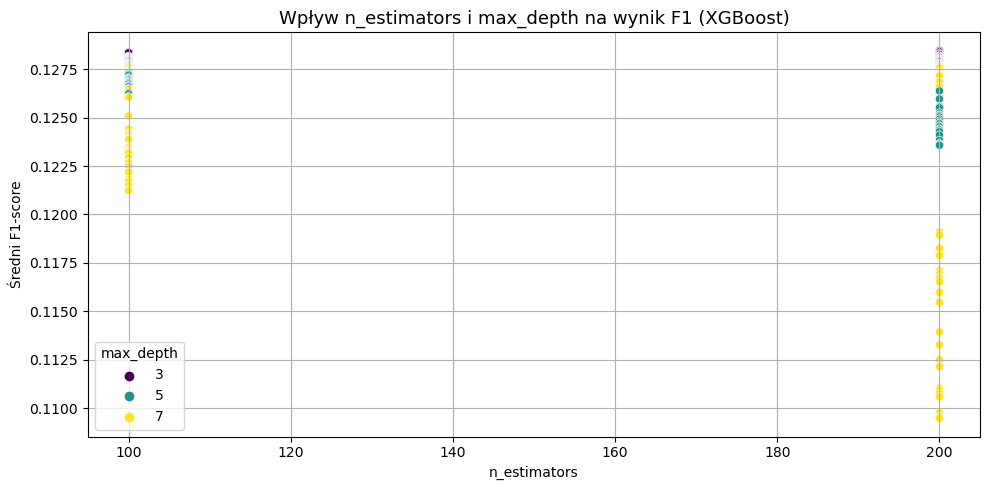

In [11]:
#📈 2. Wykres punktowy – wpływ wybranych parametrów na F1 (np. max_depth, n_estimators):

# Punktowy wykres: n_estimators vs mean_test_score
plt.figure(figsize=(10, 5))
sns.scatterplot(data=results_df, x='param_n_estimators', y='mean_test_score', hue='param_max_depth', palette='viridis')
plt.title('Wpływ n_estimators i max_depth na wynik F1 (XGBoost)', fontsize=13)
plt.xlabel('n_estimators')
plt.ylabel('Średni F1-score')
plt.legend(title='max_depth')
plt.grid(True)
plt.tight_layout()
plt.show()


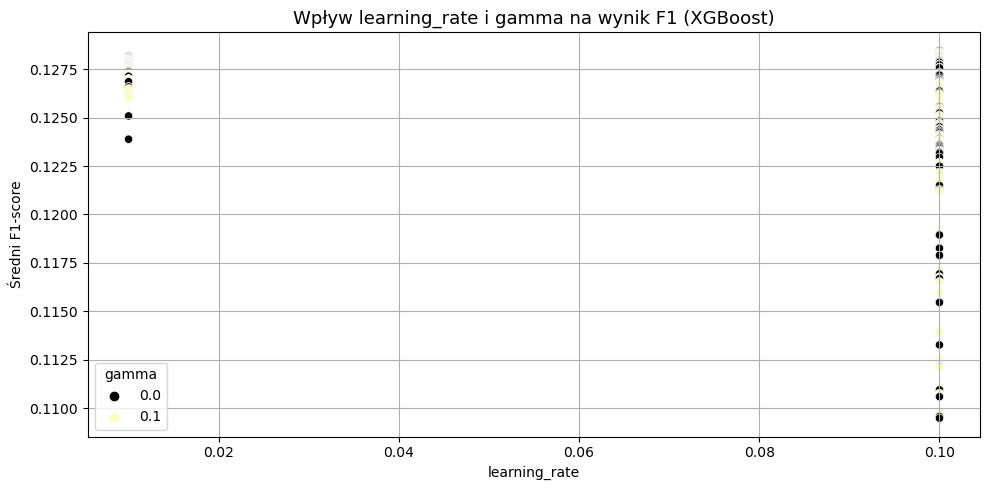

In [80]:
#📈 3. Jeszcze jeden – wpływ learning_rate i gamma:


plt.figure(figsize=(10, 5))
sns.scatterplot(data=results_df, x='param_learning_rate', y='mean_test_score', hue='param_gamma', palette='magma')
plt.title('Wpływ learning_rate i gamma na wynik F1 (XGBoost)', fontsize=13)
plt.xlabel('learning_rate')
plt.ylabel('Średni F1-score')
plt.legend(title='gamma')
plt.grid(True)
plt.tight_layout()
plt.show()


✅ Najlepsze hiperparametry:
{'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'scale_pos_weight': 20, 'subsample': 1.0}

📊 Raport klasyfikacji dla najlepszego modelu XGBoost:

              precision    recall  f1-score   support

           0     0.9774    0.6570    0.7858     61576
           1     0.0706    0.6317    0.1270      2539

    accuracy                         0.6560     64115
   macro avg     0.5240    0.6444    0.4564     64115
weighted avg     0.9415    0.6560    0.7597     64115



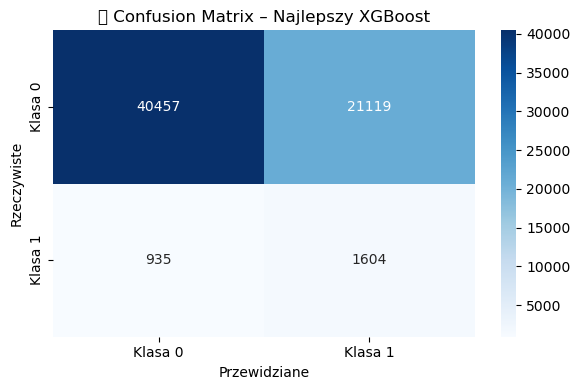

In [12]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Najlepsze hiperparametry
print("✅ Najlepsze hiperparametry:")
print(grid_search_xgb.best_params_)

# 2. Najlepszy model i przewidywania
best_model = grid_search_xgb.best_estimator_
y_pred = best_model.predict(X_test)

# 3. Raport klasyfikacji
print("\n📊 Raport klasyfikacji dla najlepszego modelu XGBoost:\n")
print(classification_report(y_test, y_pred, digits=4))

# 4. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
labels = ['Klasa 0', 'Klasa 1']

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel("Przewidziane")
plt.ylabel("Rzeczywiste")
plt.title("🌀 Confusion Matrix – Najlepszy XGBoost")
plt.tight_layout()
plt.show()


In [13]:
import pickle
def save_model(model, path):
    with open(path, 'wb') as f:
        pickle.dump(model, f)

save_model(best_model, "models/xgboost.pkl")